In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Generic Data Cleaning and EDA

### Import Data and Check the properties

In [2]:
df=pd.read_csv("Structural Measures_Hospital.csv",encoding='latin1')

In [3]:
df.head()

Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   
2  DOTHAN    AL     36301     HOUSTON    3347938701   
3  DOTHAN    AL     36301     HOUSTON    3347938701   
4  DOTHAN    AL     36301     HOUSTON    3347938701   

                                        Measure Name        Measure ID  \
0         Able to receive lab results electronically             OP_12   
1  Able to track patients lab results, tests, an...             OP_17   
2            Safe surgery checklist use (outpatient)             OP_25   
3                           Cardiac surgery registry      SM_PART_CARD   
4                           General Surgery Registry  SM_PART_GEN_SURG   

  Measure Response Footnote Measure Start Date Measure End Date  
0              Yes      NaN         01/01/2014       12/31/2014  
1              Yes      NaN         01/01/2014       12/31/2014  
2              Yes      NaN         01/01/2014       12/31/2014  
3                Y      NaN         01/01/2014       12/31/2014  
4                N      NaN         01/01/2014       12/31/2014

In [6]:
df.shape

(33856, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33856 entries, 0 to 33855
Data columns (total 14 columns):
Provider ID           33856 non-null int64
Hospital Name         33856 non-null object
Address               33856 non-null object
City                  33856 non-null object
State                 33856 non-null object
ZIP Code              33856 non-null int64
County Name           33751 non-null object
Phone Number          33856 non-null int64
Measure Name          33856 non-null object
Measure ID            33856 non-null object
Measure Response      33856 non-null object
Footnote              9686 non-null object
Measure Start Date    33856 non-null object
Measure End Date      33856 non-null object
dtypes: int64(3), object(11)
memory usage: 3.6+ MB


In [8]:
# Check the data for percentage of null values

round((df.isnull().sum()/df.isnull().count())*100,2)

Provider ID            0.00
Hospital Name          0.00
Address                0.00
City                   0.00
State                  0.00
ZIP Code               0.00
County Name            0.31
Phone Number           0.00
Measure Name           0.00
Measure ID             0.00
Measure Response       0.00
Footnote              71.39
Measure Start Date     0.00
Measure End Date       0.00
dtype: float64

#### Dropping columns having more than 50% null values and eliminating rows having null values

In [9]:
df= df.dropna(axis=1, thresh=int(0.5*len(df)))
df.shape

(33856, 13)

In [10]:
df=df.dropna(axis=0, how='any')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33751 entries, 0 to 33855
Data columns (total 13 columns):
Provider ID           33751 non-null int64
Hospital Name         33751 non-null object
Address               33751 non-null object
City                  33751 non-null object
State                 33751 non-null object
ZIP Code              33751 non-null int64
County Name           33751 non-null object
Phone Number          33751 non-null int64
Measure Name          33751 non-null object
Measure ID            33751 non-null object
Measure Response      33751 non-null object
Measure Start Date    33751 non-null object
Measure End Date      33751 non-null object
dtypes: int64(3), object(10)
memory usage: 3.6+ MB


In [12]:
# Drop duplicate records if any
df=df.drop_duplicates(keep='first', inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33751 entries, 0 to 33855
Data columns (total 13 columns):
Provider ID           33751 non-null int64
Hospital Name         33751 non-null object
Address               33751 non-null object
City                  33751 non-null object
State                 33751 non-null object
ZIP Code              33751 non-null int64
County Name           33751 non-null object
Phone Number          33751 non-null int64
Measure Name          33751 non-null object
Measure ID            33751 non-null object
Measure Response      33751 non-null object
Measure Start Date    33751 non-null object
Measure End Date      33751 non-null object
dtypes: int64(3), object(10)
memory usage: 3.6+ MB


### Removing unwanted data -

### This step will be specific to your dataset 
data where most of the metrics are not available/not applicable wont give any info so removing such records.
Address , city, state can be removed as we have Zip Code 

In [13]:
df=df[~(df["Measure Response"].isin(['Not Applicable','Not Available']))]# & (df["Score"].isin(['Not Applicable','Not Available'])) & (df["Lower Estimate"].isin(['Not Applicable','Not Available'])) & (df["Higher Estimate"].isin(['Not Applicable','Not Available']))]

In [14]:
df=df.drop(["Address","City","State","Phone Number"],axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24159 entries, 0 to 33788
Data columns (total 9 columns):
Provider ID           24159 non-null int64
Hospital Name         24159 non-null object
ZIP Code              24159 non-null int64
County Name           24159 non-null object
Measure Name          24159 non-null object
Measure ID            24159 non-null object
Measure Response      24159 non-null object
Measure Start Date    24159 non-null object
Measure End Date      24159 non-null object
dtypes: int64(2), object(7)
memory usage: 1.8+ MB


### Converting some categorical variables to numeric

In [16]:
df["Measure Response"] = df["Measure Response"].replace(['Does not have a Cardiac Surgery Program','No','N'],0)
df["Measure Response"] = df["Measure Response"].replace(['Yes','Y'],1)


In [20]:
df["Measure Response"] = df["Measure Response"].astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24159 entries, 0 to 33788
Data columns (total 9 columns):
Provider ID           24159 non-null int64
Hospital Name         24159 non-null object
ZIP Code              24159 non-null int64
County Name           24159 non-null object
Measure Name          24159 non-null object
Measure ID            24159 non-null object
Measure Response      24159 non-null int32
Measure Start Date    24159 non-null object
Measure End Date      24159 non-null object
dtypes: int32(1), int64(2), object(6)
memory usage: 2.4+ MB


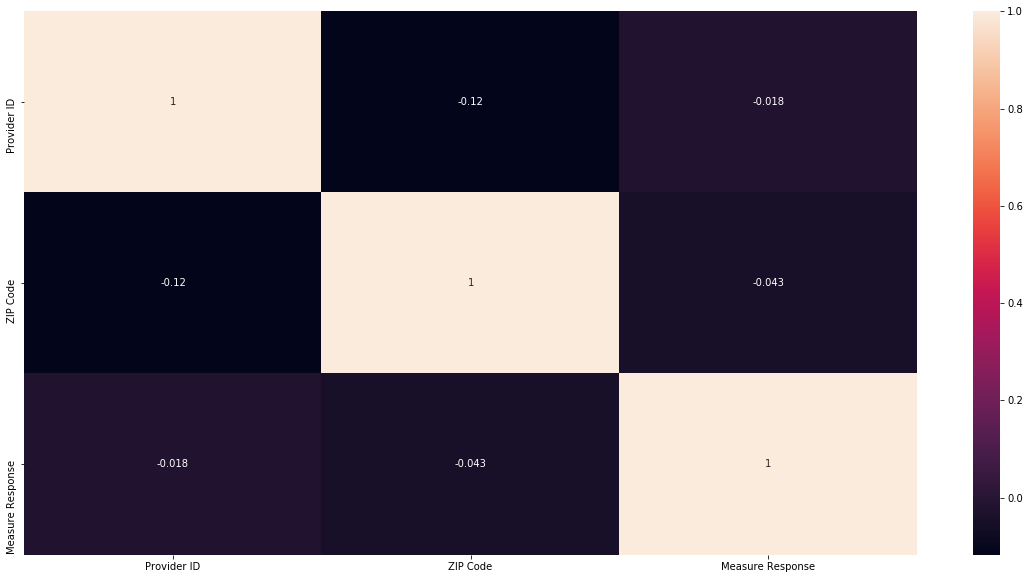

In [22]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

## We can see that there is no significant correlation amoung the columns ; hence heekping all these columns in the dataset for now ; we can later remove certain fields when we merge it to other datasets.

## Writing cleaned data to another file

In [23]:
df.to_csv('Structural_Measures.csv')

In [24]:
StrM = df[:]
StrM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24159 entries, 0 to 33788
Data columns (total 9 columns):
Provider ID           24159 non-null int64
Hospital Name         24159 non-null object
ZIP Code              24159 non-null int64
County Name           24159 non-null object
Measure Name          24159 non-null object
Measure ID            24159 non-null object
Measure Response      24159 non-null int32
Measure Start Date    24159 non-null object
Measure End Date      24159 non-null object
dtypes: int32(1), int64(2), object(6)
memory usage: 1.8+ MB
